In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_study_df['Mouse ID'].nunique()

249

In [3]:
#locates all rows that are duplicates and prints them
mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
#df[ (df['Age'] >= 20) ].index
mouse_index = mouse_study_df[(mouse_study_df['Mouse ID']=='g989')].index
mouse_study_cleaned = mouse_study_df.drop(mouse_index)
mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
mouse_study_cleaned['Mouse ID'].nunique()

248

In [9]:
#groupby drug type
drug_group = mouse_study_cleaned.groupby(mouse_study_cleaned['Drug Regimen'])

#calculate summary stats
mean_tumor_volume = drug_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_group['Tumor Volume (mm3)'].median()
variance_tumor_volume = drug_group['Tumor Volume (mm3)'].var()
std_tumor_volume = drug_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_group['Tumor Volume (mm3)'].sem()

#merge summary stats into a DataFrame, renaming columns as we go
summary_stats = pd.concat([mean_tumor_volume.rename('Mean Tumor Volume'), median_tumor_volume.rename('Median Tumor Volume'), 
                           variance_tumor_volume.rename('Tumor Volume Variance'), std_tumor_volume.rename('Tumor Volume Std. Dev.'),
                           sem_tumor_volume.rename('Tumor Volume Std. Err.')], axis=1)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
summary_stats_alt = drug_group.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_stats_alt

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

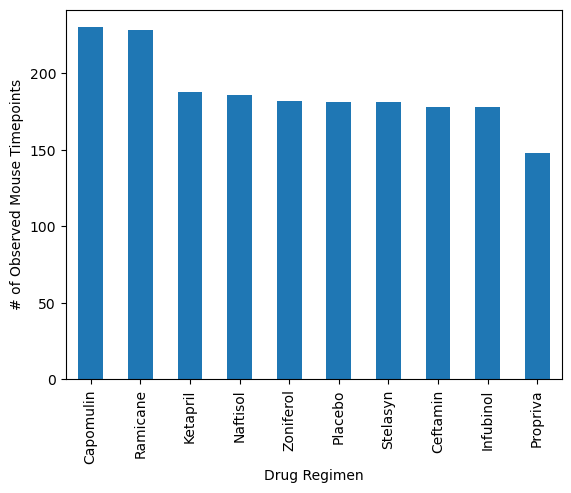

In [10]:
#creates a dataframe based on the count of the drug_group data
drug_df = drug_group.count().sort_values(by='Timepoint', ascending=False)
#bar chart of timepoint couny per drug
drug_df.plot(kind='bar', y='Timepoint', ylabel='# of Observed Mouse Timepoints', legend=False)

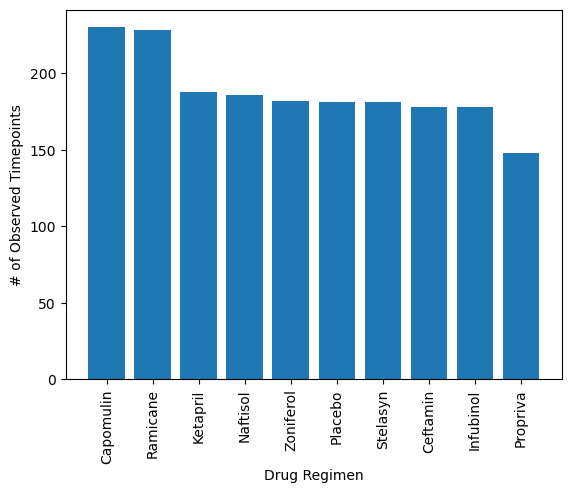

In [11]:
#same bar chart but using matplotlib
plt.bar(drug_df.index, drug_df['Timepoint'])
plt.xlabel('Drug Regimen', horizontalalignment='center')
plt.ylabel('# of Observed Timepoints')
plt.xticks(horizontalalignment='center', rotation=90)
plt.show()

<Axes: ylabel='Sex'>

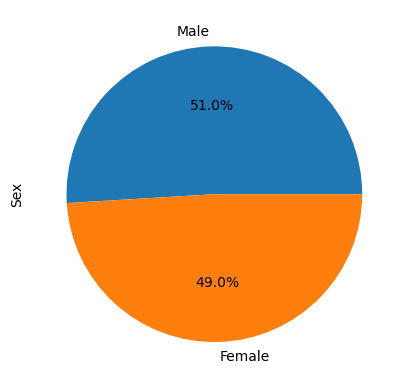

In [13]:
#pie chart using pandas
mouse_study_cleaned['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

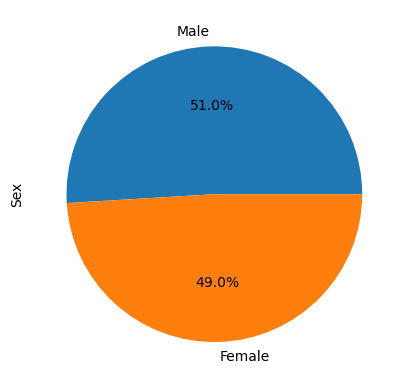

In [14]:
#pie chart using matplotlib
plt.pie(mouse_study_cleaned['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

In [71]:
#group by mouse id
mouse_group = mouse_study_cleaned.groupby('Mouse ID')
#merge into a dataframe that contains the final datapoint for each mouse
final_timepoints_df = pd.merge(mouse_group.max()['Timepoint'], mouse_study_cleaned, on=['Mouse ID','Timepoint'], how='left')


In [73]:
poi_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = []

for drug in poi_treatments:
    tumor_volumes =[final_timepoints_df['Tumor Volume (mm3)'] for row in final_timepoints_df if final_timepoints_df['Drug Regimen']==drug]
    final_tumor_volume.append(tumor_volumes)
    
final_tumor_volume

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().